In [109]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [110]:
df =pd.DataFrame()

In [111]:

df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [112]:
df.head()

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


In [113]:
import seaborn as sns


<Axes: xlabel='x1', ylabel='x2'>

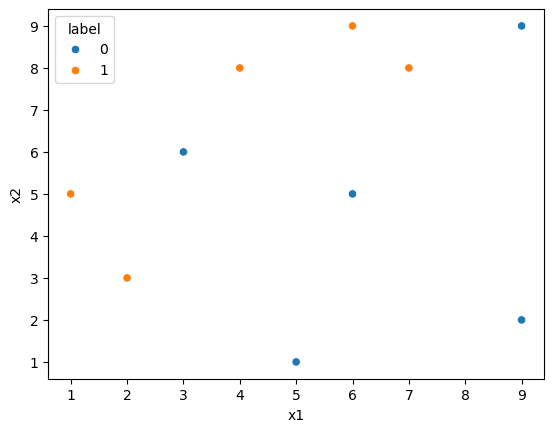

In [114]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [115]:
df['weights']= 1/df.shape[0]

In [116]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt = DecisionTreeClassifier(max_depth=1)  # Stump

In [119]:
x = df[['x1','x2']].values
y = df['label'].values

In [120]:
dt.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

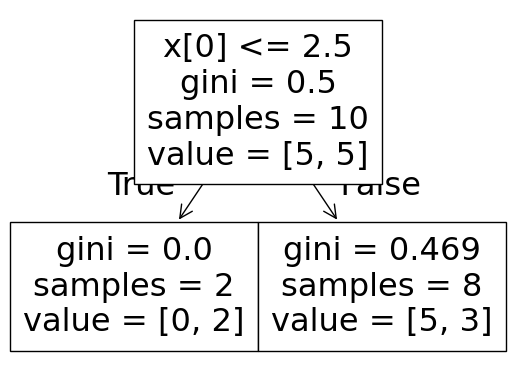

In [121]:
from sklearn.tree import plot_tree
plot_tree(dt)

<Axes: >

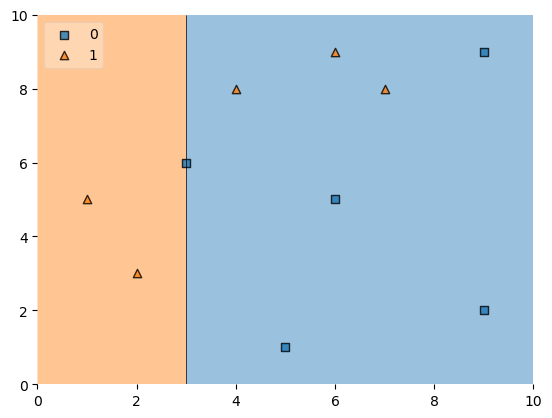

In [122]:
plot_decision_regions(x, y, clf=dt, legend=2)

In [123]:
df['y_pred']=dt.predict(x)

In [124]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [125]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [126]:

# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1
     

np.float64(0.42364893019360184)

In [127]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [128]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [129]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [130]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [131]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()


In [132]:
df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [133]:
df['nomalized_weights'].sum()


np.float64(1.0)

In [134]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])


In [135]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']


In [136]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [137]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [138]:
index_values = create_new_dataset(df)

index_values

[7, 5, 5, 0, 1, 3, 3, 8, 5, 5]

In [139]:

s_df = df.iloc[index_values,[0,1,2,3]]

In [140]:
s_df

,x1,x2,label,weights
7,7,8,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [141]:
dt2 = DecisionTreeClassifier(max_depth=1)  # Stump
x = s_df[['x1','x2']].values
y = s_df['label'].values
dt2.fit(x,y)
     

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

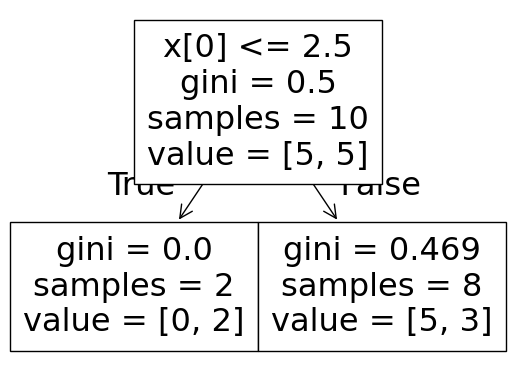

In [142]:
plot_tree(dt)

<Axes: >

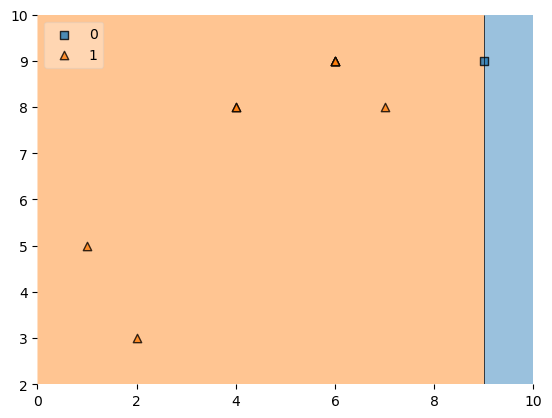

In [143]:
plot_decision_regions(x, y, clf=dt2, legend=2)

In [144]:

s_df['y_pred'] = dt2.predict(x)
s_df

,x1,x2,label,weights,y_pred
7,7,8,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [145]:
alpha2 = calculate_model_weight(0.1)
     

alpha2

np.float64(1.0986122886681098)

In [146]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
  
s_df['updated_weights'] = s_df.apply(update_row_weights,axis=1)
s_df

,x1,x2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


In [147]:
s_df['nomalized_weights'] = s_df['updated_weights']/s_df['updated_weights'].sum()
s_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
7,7,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1
1,2,3,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
8,9,9,0,0.1,0,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1


In [148]:
s_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [149]:
s_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
7,7,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1
1,2,3,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
8,9,9,0,0.1,0,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1


In [150]:
s_df['cumsum_upper'] = np.cumsum(s_df['nomalized_weights'])
s_df['cumsum_lower'] = s_df['cumsum_upper'] - s_df['nomalized_weights']

In [151]:
s_df[['x1','x2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.1,0.0,0.1
5,6,9,1,0.1,1,0.1,0.1,0.2
5,6,9,1,0.1,1,0.1,0.2,0.3
0,1,5,1,0.1,1,0.1,0.3,0.4
1,2,3,1,0.1,1,0.1,0.4,0.5
3,4,8,1,0.1,1,0.1,0.5,0.6
3,4,8,1,0.1,1,0.1,0.6,0.7
8,9,9,0,0.1,0,0.1,0.7,0.8
5,6,9,1,0.1,1,0.1,0.8,0.9
5,6,9,1,0.1,1,0.1,0.9,1.0


In [152]:

index_values = create_new_dataset(s_df)
     

third_df = s_df.iloc[index_values,[0,1,2,3]]
     

third_df

,x1,x2,label,weights
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [153]:
dt3 = DecisionTreeClassifier(max_depth=1)

x = s_df[['x1','x2']].values
y = s_df['label'].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

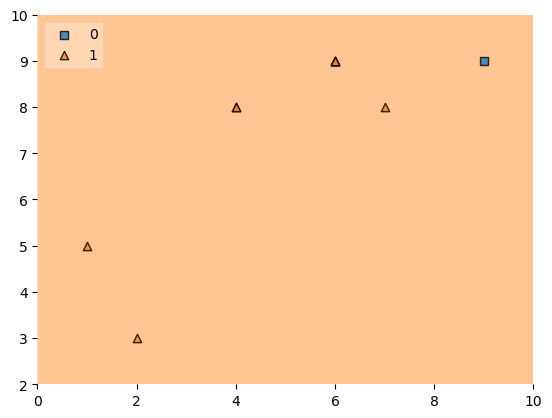

In [154]:
plot_decision_regions(x, y, clf=dt3, legend=2)


In [155]:

third_df['y_pred'] = dt3.predict(x)
     

third_df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1


In [156]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [157]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


PREDICTION

In [158]:
query = np.array([1,5]).reshape(1,2)
dt.predict(query)

array([1])

In [159]:
dt2.predict(query)

array([1])

In [160]:
dt3.predict(query)

array([1])

In [167]:
alpha1*(1) + alpha2*(1) + alpha3*(1)


np.float64(1.09861228866811)

In [168]:
np.sign(1.09)

np.float64(1.0)

In [169]:
query = np.array([9,9]).reshape(1,2)
dt.predict(query)

array([0])

In [170]:
dt2.predict(query)

array([0])

In [171]:
dt3.predict(query)

array([1])

In [172]:
alpha1*(-1) + alpha2*(-1) + alpha3*(1)


np.float64(-1.9459101490553135)

In [173]:
np.sign(-1.9)

np.float64(-1.0)